# Bank Marketing Data Cleaning & EDA

## 1. Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 2. Dataset Loading

In [37]:
data = pd.read_csv('bank_marketing.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,no.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. Intial Inspection

In [38]:
data.shape

(41188, 21)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [40]:
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [41]:
# missing values
data.isnull().sum().sum()

0

## 4. Data Cleaning

In [42]:
# Object columns value counts
for i in data.columns:
    if data[i].dtype == object:
        print(i)
        print(data[i].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
contact
cellular     26144
telephone    15044
Name: contact, 

In [44]:
# Replace 'unknown' with NaN for better handling
data.replace("unknown", np.nan, inplace=True)

# Check missing values after replacement
data.isnull().sum()


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
no.employed          0
y                    0
dtype: int64

In [46]:
un_cols = ['job', 'marital', 'education','default', 'housing', 'loan']

for col in un_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


no     41185
yes        3
Name: default, dtype: int64

In [49]:
data.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,no.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000073,0.547878,0.151695,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.008534,0.497708,0.358729,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## 5. Feature Engineering

In [47]:
# Standardize binary columns
bin_cols = ['default','housing','loan','y']
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,no.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [48]:
# Separate numerical and categorical columns
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include='object').columns

## 6. Exploratory Data Analysis(EDA)

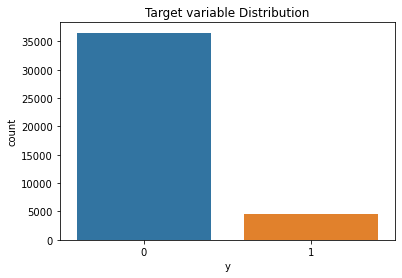

In [33]:
sns.countplot(x='y', data=data)
plt.title('Target variable Distribution')
plt.show()

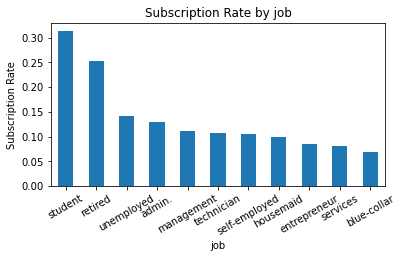

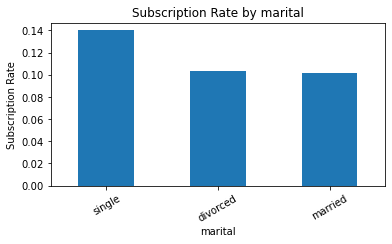

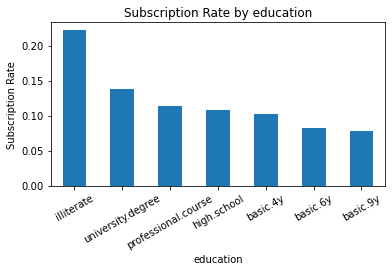

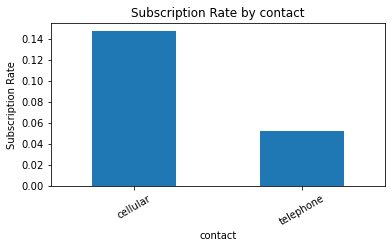

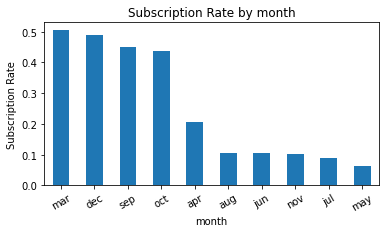

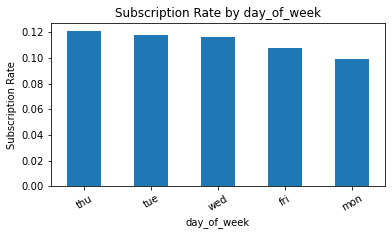

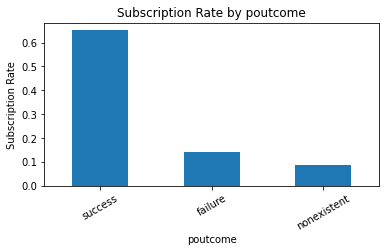

In [34]:
# Subscription rate across Categorical columns
for col in cat_cols:
    rate = data.groupby(col)['y'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6,3))
    rate.plot(kind='bar')
    plt.title(f'Subscription Rate by {col}')
    plt.xticks( rotation=30) 
    plt.ylabel('Subscription Rate')
    plt.show()

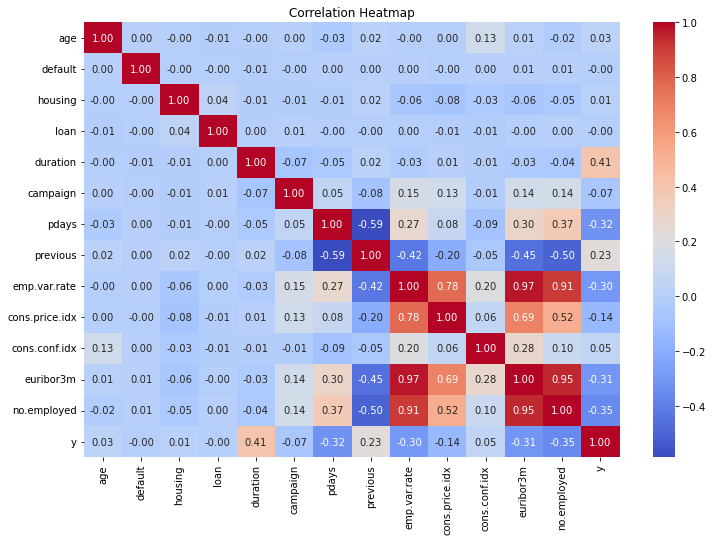

In [35]:
# Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [51]:
data.to_csv("bank_marketing_cleaned.csv", index=False)

## 7. Key Insights from EDA

* The target variable is **highly imbalanced**, so precision, recall, and F1-score are preferred over accuracy.
* **Call duration** shows the strongest positive correlation with subscription, highlighting the role of customer engagement.
* **Economic indicators** (euribor3m, emp.var.rate, no.employed) influence subscription behavior and exhibit multicollinearity.
* **Previous campaign interactions** improve the likelihood of subscription.
* **Demographic features** have limited direct impact on subscription.
